<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

**Objective:**

This project aims to perform a comprehensive Exploratory Data Analysis (EDA) on AtliQ Hotels' hospitality data to uncover key insights into booking and revenue performance from May to July. The goal is to identify trends, pinpoint areas of opportunity, and provide actionable business recommendations to optimize revenue, improve occupancy rates, and enhance guest satisfaction.
By combining multiple datasets, this analysis will provide a data-driven narrative for stakeholders to make informed strategic decisions.


In [2]:
# Importing the necessary Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [3]:
# Loading all the datsets
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')
df_august = pd.read_csv("datasets/new_data_august.csv")

In [4]:
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [7]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<Axes: >

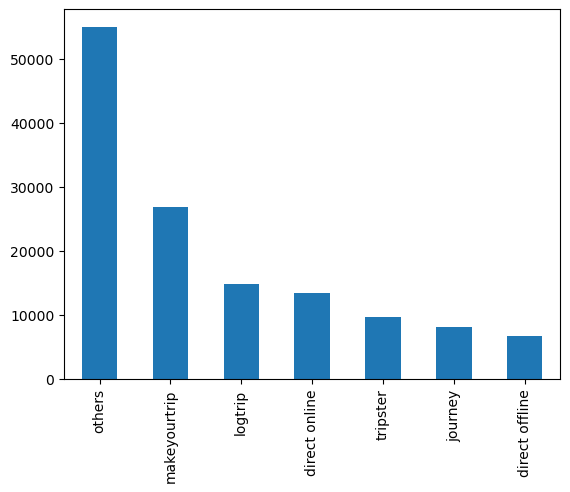

In [8]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [8]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [10]:
df_agg_bookings.head(15)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
6,19558,1-May-22,RT1,25,40.0
7,19560,1-May-22,RT1,23,26.0
8,17561,1-May-22,RT1,22,NaN
9,16560,1-May-22,RT1,24,34.0


In [11]:
#Find out unique property ids in aggregate bookings dataset
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [12]:
 #Find out total bookings per property_id
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [20]:
#Find out total bookings per property_id
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [13]:
#Find out days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [14]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [14]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [15]:
df_hotels.city.value_counts().sort_values(ascending=False)

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<Axes: >

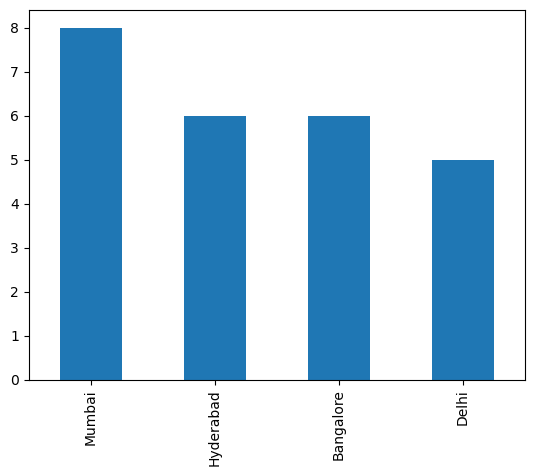

In [16]:
df_hotels.city.value_counts().plot(kind="bar")

***
### ==> 2. Data Cleaning
***

In [17]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [18]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.
Negative guest numbers are logically impossible.

In [19]:
df_bookings = df_bookings[df_bookings.no_guests>0]

#Out of 134590 records we have 9 records which are negative in values so of data analysis
#we can remove these records and use on only positive records

In [20]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated (3 Sigma Rule)**

In [21]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

Here max revenue generated is 28560000 which is obviously something that none of the customer will pay for 1 night so, here we can use Three Sigma Rule to avoid this error. The three-sigma rule, also known as the "3 times the standard deviation" rule,is a common method for identifying outliers in data. The rule states that a value is an outlier if its absolute value is more than three times the standard deviation of the values


In [22]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [23]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [24]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [25]:
df_bookings[df_bookings.revenue_generated<=0]
# So here we don't need to use our lower limit

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [26]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [27]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [28]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [29]:
higher_limit = df_bookings.revenue_realized.mean()+3*df_bookings.revenue_realized.std()
higher_limit

33479.3586618449

In [30]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [32]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [31]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [33]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [34]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [35]:
df_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [36]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [37]:
df_agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
6,19558,1-May-22,RT1,25,40.0
7,19560,1-May-22,RT1,23,26.0
8,17561,1-May-22,RT1,22,NaN
9,16560,1-May-22,RT1,24,34.0


In [38]:
df_rooms.isnull().sum()

room_id       0
room_class    0
dtype: int64

In [39]:
df_date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [40]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


Convert date columns to datetime objects for proper analysis

In [41]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [42]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [43]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [44]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [45]:
df_bookings["check_in_date"] = pd.to_datetime(df_bookings["check_in_date"])
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [46]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


Merging Datasets

In [47]:
df = pd.merge(df_bookings, df_hotels, on="property_id")

In [48]:
df = pd.merge(df, df_rooms, left_on='room_category',right_on="room_id")

In [49]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")

In [50]:
df.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
5,May052216558RT16,16558,29-04-22,2022-05-05,11/5/2022,3.0,RT1,others,NaN,Cancelled,...,4004,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
6,May052216558RT17,16558,15-04-22,2022-05-05,6/5/2022,3.0,RT1,others,4.0,Checked Out,...,10010,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
7,May052216558RT18,16558,29-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
8,May052216558RT19,16558,29-04-22,2022-05-05,8/5/2022,2.0,RT1,makeyourtrip,4.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday
9,May052216558RT110,16558,3/5/2022,2022-05-05,7/5/2022,2.0,RT1,logtrip,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday


Occupancy Rate (from fact_aggregated_bookings)

In [51]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


In [52]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [53]:
df_agg_bookings["check_in_date"]= pd.to_datetime(df_agg_bookings["check_in_date"])

In [54]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9198 non-null   float64       
 5   occ_pct              9198 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 431.4+ KB


#ADR (Average Daily Rate) 

In [55]:
df['ADR'] = df.apply(lambda row: row['revenue_realized']/row['no_guests'], axis=1)

In [56]:
df['ADR'] = df['ADR'].round(2)

In [57]:
df.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,property_name,category,city,room_id,room_class,date,mmm yy,week no,day_type,ADR
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,3336.67
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,1820.00
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,3336.67
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,4550.00
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,2730.00
5,May052216558RT16,16558,29-04-22,2022-05-05,11/5/2022,3.0,RT1,others,NaN,Cancelled,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,1334.67
6,May052216558RT17,16558,15-04-22,2022-05-05,6/5/2022,3.0,RT1,others,4.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,3336.67
7,May052216558RT18,16558,29-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,1820.00
8,May052216558RT19,16558,29-04-22,2022-05-05,8/5/2022,2.0,RT1,makeyourtrip,4.0,Checked Out,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,4550.00
9,May052216558RT110,16558,3/5/2022,2022-05-05,7/5/2022,2.0,RT1,logtrip,NaN,Cancelled,...,Atliq Grands,Luxury,Delhi,RT1,Standard,2022-05-05,May 22,W 19,weekeday,1820.00


**KPI's**

In [153]:
#Total bookings
total_bookings=len(df.booking_id)
total_bookings

92578

In [137]:
# Total Successful Bookings
total_successful_bookings = (df["booking_status"]=="Checked Out").sum()
total_successful_bookings

64936

In [138]:
# Total Cancelled Bookings

total_cancelled_bookings = (df["booking_status"]=="Cancelled").sum()
total_cancelled_bookings

22975

In [139]:
# Total No Show Bookings
total_no_show_bookings = (df["booking_status"]=="No Show").sum()
total_no_show_bookings

4667

In [136]:
#Total Revenue
total_revenue= df["revenue_realized"].sum()
total_revenue

1175507782

In [160]:
#Cancellation %
Cancellation_pct = (df["booking_status"]=='Cancelled').sum()/len(df.booking_id)
Cancellation_pct

0.24816911145196482

In [162]:
#No show rate %
no_show_pct = (df["booking_status"]=='No Show').sum()/len(df.booking_id)
no_show_pct

0.05041154485946985

In [65]:
#Average Rating
df["ratings_given"].mean()

3.616515081444941

In [127]:
# ADR: Average revenue per booking
ADR = df['revenue_realized'].sum() / df['booking_id'].count()
ADR

12697.485169262676

In [163]:
# Realisation pct
Realisation_pct = 1-(Cancellation_pct + no_show_pct)
Realisation_pct

0.7014193436885654

In [133]:
#Total Capacity
total_capacity = df_agg['capacity'].sum()
total_capacity

232530.0

In [134]:
#RevPAR Revenue per Available room
RevPAR = df['revenue_realized'].sum()/total_capacity
RevPAR

5055.295153313551

In [157]:
#Total Checked out
total_checked_out = (df["booking_status"]=="Checked Out").sum()
total_checked_out

64936

In [150]:
#No of days

no_of_days = (max(df_date["date"])-min(df_date["date"])).days+1
no_of_days

92

In [155]:
#DBRN(Daily Booked Room Nights)
#This metrics tells on average how many rooms are booked for a day considering a time period

DBRN = total_bookings/no_of_days
DBRN

1006.2826086956521

In [156]:
#DSRN(Daily Sellable Room Nights)
#This metrics tells on average how many rooms are ready to sell for a day considering a time period

DSRN = total_capacity/no_of_days
DSRN

2527.5

In [158]:
#DURN(Daily Utilized Room Nights)
#This metric tells on average how many rooms are succesfully utilized by customers for a day considering a time period

DURN = total_checked_out/no_of_days
DURN

705.8260869565217

#Monthly & Weekely Trends

In [67]:
#Monthly Revenue
revenue_monthly  = df.groupby("mmm yy")["revenue_realized"].sum()
revenue_monthly

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

In [68]:
#Monthly bookings 
bookings_monthly = df.groupby("mmm yy")["booking_id"].count()
bookings_monthly

mmm yy
Jul 22    30700
Jun 22    29738
May 22    32140
Name: booking_id, dtype: int64

In [69]:
#Print revenue realized per hotel type
df.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        179416721
Atliq Blu        179203544
Atliq City       196555383
Atliq Exotica    219076161
Atliq Grands     145860641
Atliq Palace     209474575
Atliq Seasons     45920757
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

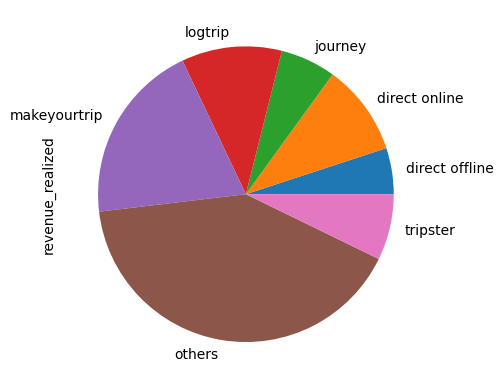

In [70]:
df.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")

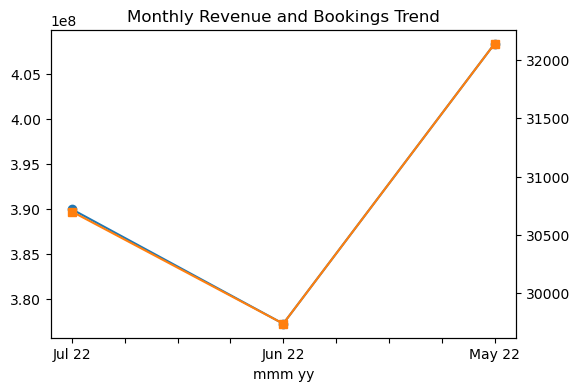

In [74]:
plt.figure(figsize=(6,4))
revenue_monthly.plot(label='Revenue', marker='o')
bookings_monthly.plot(label='Bookings', marker='s', secondary_y=True)
plt.title("Monthly Revenue and Bookings Trend")
plt.show()

In [72]:
df_agg = pd.merge(df_agg_bookings, df_hotels, on="property_id").merge(df_rooms, left_on='room_category',right_on="room_id").merge(df_date, left_on="check_in_date", right_on="date")

#Occupancy by Room/Hotel Analysis

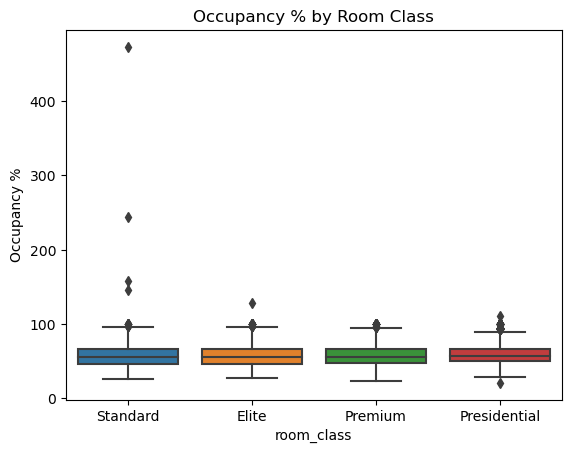

In [73]:
sns.boxplot(data=df_agg, x='room_class', y='occ_pct')
plt.title("Occupancy % by Room Class")
plt.ylabel("Occupancy %")
plt.show()

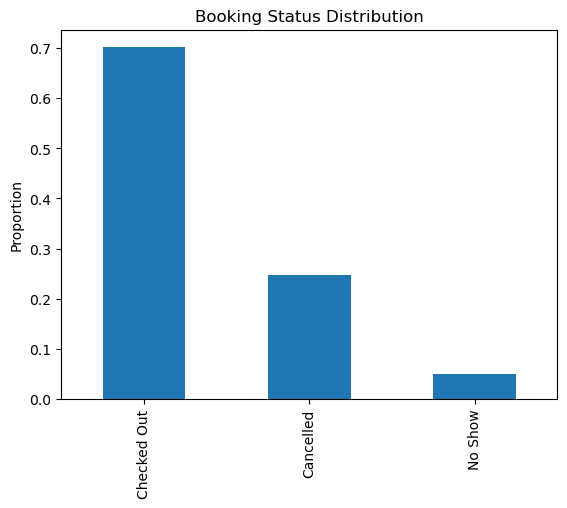

In [74]:
status_counts = df['booking_status'].value_counts(normalize=True)
status_counts.plot(kind='bar')
plt.title("Booking Status Distribution")
plt.ylabel("Proportion")
plt.show()

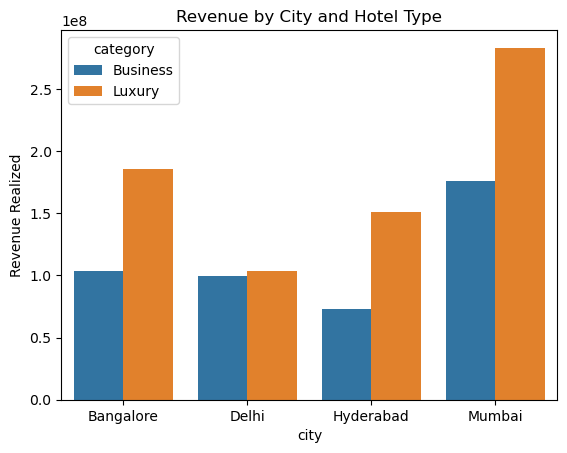

In [75]:
city_cat = df.groupby(['city', 'category']).agg({'revenue_realized':'sum','booking_id':'count'}).reset_index()
sns.barplot(data=city_cat, x='city', y='revenue_realized', hue='category')
plt.title("Revenue by City and Hotel Type")
plt.ylabel("Revenue Realized")
plt.show()

In [88]:
df_agg.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'property_name', 'category', 'city', 'room_id',
       'room_class', 'date', 'mmm yy', 'week no', 'day_type', 'occ_pct'],
      dtype='object')

**1. Overall Performance**

In [76]:
# Overall Occupancy %
overall_occupancy = (df_agg['successful_bookings'].sum() / df_agg['capacity'].sum()) * 100
overall_occupancy

57.9852062099514

In [93]:
#Total Revenue
total_revenue = df["revenue_realized"].sum()
total_revenue

1175507782

**2. Performance by City**

In [95]:
Avg_city_occupancy = df_agg.groupby('city')["occ_pct"].mean().round(2).sort_values(ascending=False)
Avg_city_occupancy

city
Delhi        60.40
Hyderabad    56.94
Mumbai       56.78
Bangalore    55.29
Name: occ_pct, dtype: float64

In [165]:
Revenue_by_city = df.groupby('city')["revenue_realized"].sum().round(2).sort_values(ascending=False)
Revenue_by_city

city
Mumbai       459364089
Bangalore    288827235
Hyderabad    224048470
Delhi        203267988
Name: revenue_realized, dtype: int64

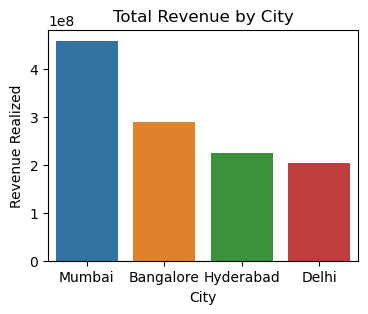

In [167]:
plt.figure(figsize=(4,3))
sns.barplot(x=Revenue_by_city.index,y=Revenue_by_city.values)
plt.title('Total Revenue by City')
plt.ylabel('Revenue Realized')
plt.xlabel('City')
plt.show()

**3. Seasonal Trends & Day of the week**

In [113]:
Avg_monthly_occupancy = df_agg.groupby("mmm yy")["occ_pct"].mean().round(2).sort_values(ascending=False)
Avg_monthly_occupancy

mmm yy
Jun 22    58.79
May 22    57.07
Jul 22    55.77
Name: occ_pct, dtype: float64

In [114]:
Avg_occupancy_bydaytype = df_agg.groupby("day_type")["occ_pct"].mean().round(2).sort_values(ascending=False)
Avg_occupancy_bydaytype

day_type
weekend     72.39
weekeday    50.90
Name: occ_pct, dtype: float64

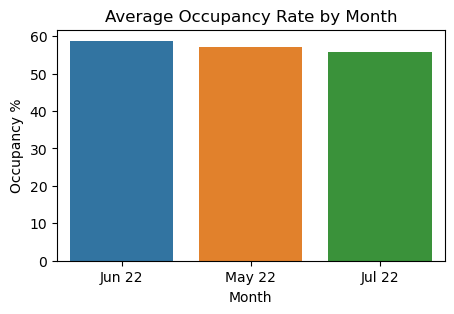

In [116]:
plt.figure(figsize=(5, 3))
sns.barplot(x=Avg_monthly_occupancy.index, y=Avg_monthly_occupancy.values)
plt.title('Average Occupancy Rate by Month')
plt.ylabel('Occupancy %')
plt.xlabel('Month')
plt.show()

In [77]:
#Monthly Revenue
revenue_monthly  = df.groupby("mmm yy")["revenue_realized"].sum()
revenue_monthly

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

In [78]:
#Monthly bookings 
bookings_monthly = df.groupby("mmm yy")["booking_id"].count()
bookings_monthly

mmm yy
Jul 22    30700
Jun 22    29738
May 22    32140
Name: booking_id, dtype: int64

**4. Room & Platform Performance**

In [118]:
room_occupancy = df_agg.groupby("room_class")["occ_pct"].mean().round(2).sort_values(ascending=False)
room_occupancy

room_class
Presidential    58.08
Premium         56.98
Elite           56.92
Standard        56.76
Name: occ_pct, dtype: float64

In [119]:
platform_revenue = df.groupby('booking_platform')["revenue_realized"].sum().round(2).sort_values(ascending=False)
platform_revenue

booking_platform
others            480698244
makeyourtrip      233132708
logtrip           129036321
direct online     117245053
tripster           84865013
journey            71231599
direct offline     59298844
Name: revenue_realized, dtype: int64

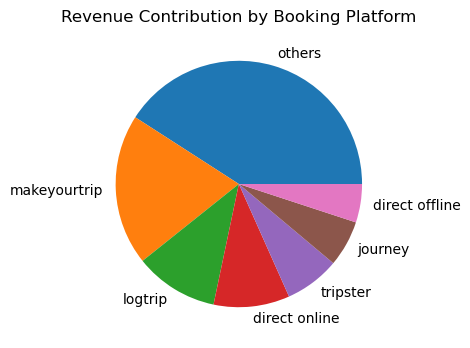

In [122]:
plt.figure(figsize=(6,4))
platform_revenue.plot(kind='pie')
plt.title('Revenue Contribution by Booking Platform')
plt.ylabel('')
plt.show()


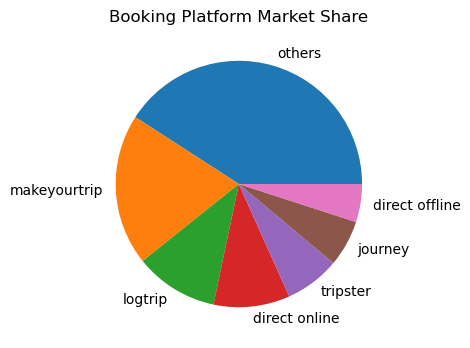

In [114]:
#Where do bookings come from?
platform_bookings = df["booking_platform"].value_counts()

plt.figure(figsize=(6,4))
platform_bookings.plot(kind='pie')
plt.title('Booking Platform Market Share')
plt.ylabel('')
plt.show()

In [168]:
platform_bookings = df["booking_platform"].value_counts()
platform_bookings

others            37839
makeyourtrip      18400
logtrip           10132
direct online      9271
tripster           6671
journey            5639
direct offline     4626
Name: booking_platform, dtype: int64

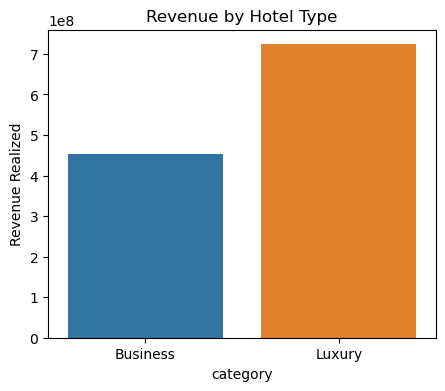

In [99]:
hotel_cat = df.groupby('category')['revenue_realized'].sum()
plt.figure(figsize=(5, 4))
sns.barplot(x=hotel_cat.index,y=hotel_cat.values)
plt.title("Revenue by Hotel Type")
plt.ylabel("Revenue Realized")
plt.show()

In [169]:
hotel_cat = df.groupby('category')['revenue_realized'].sum()
hotel_cat

category
Business    451950715
Luxury      723557067
Name: revenue_realized, dtype: int64

In [86]:
df.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'room_id',
       'room_class', 'date', 'mmm yy', 'week no', 'day_type', 'ADR'],
      dtype='object')

**5. Room Class Popularity & ADR**

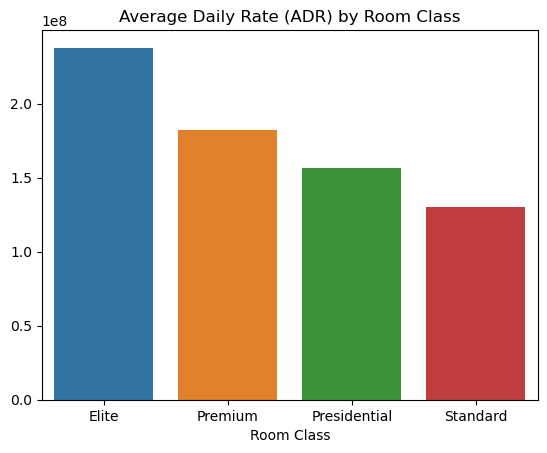

In [112]:
room_stats = df.groupby("room_class")["ADR"].sum().round(2).sort_values(ascending=False)

sns.barplot(x=room_stats.index,y=room_stats.values)
plt.title("Average Daily Rate (ADR) by Room Class")
plt.xlabel("Room Class")
plt.show()


In [170]:
room_stats = df.groupby("room_class")["ADR"].sum().round(2).sort_values(ascending=False)
room_stats

room_class
Elite           2.378049e+08
Premium         1.824423e+08
Presidential    1.562366e+08
Standard        1.303441e+08
Name: ADR, dtype: float64

**6. Cancellation & No show Analysis**

In [119]:
cancel_by_plat = df.groupby("booking_platform")['booking_status'].apply(lambda x: (x=='Cancelled').mean()).sort_values(ascending=False)
cancel_by_plat


booking_platform
tripster          0.253185
others            0.250562
makeyourtrip      0.248478
journey           0.248271
direct online     0.246467
direct offline    0.241894
logtrip           0.239735
Name: booking_status, dtype: float64

In [120]:
cancel_by_city = df.groupby("city")['booking_status'].apply(lambda x: (x=='Cancelled').mean()).sort_values(ascending=False)
cancel_by_city


city
Bangalore    0.249682
Mumbai       0.249331
Delhi        0.248052
Hyderabad    0.245417
Name: booking_status, dtype: float64

**7. Ratings & Guest Experience Analysis**

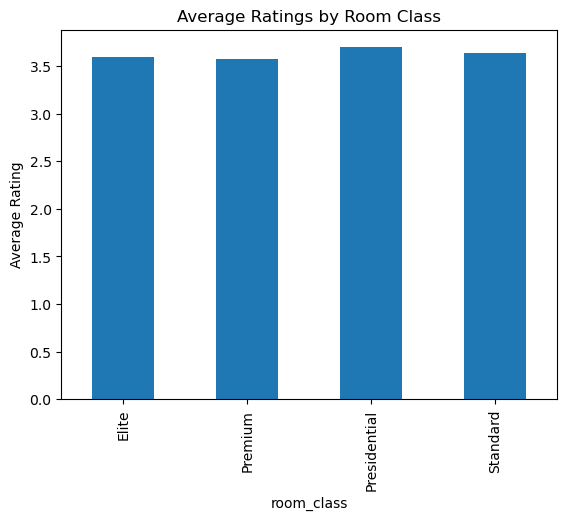

In [122]:
rating_by_room = df.groupby('room_class')['ratings_given'].mean()
rating_by_room.plot(kind='bar')
plt.title("Average Ratings by Room Class")
plt.ylabel("Average Rating")
plt.show()

In [123]:
rating_by_room

room_class
Elite           3.598328
Premium         3.578052
Presidential    3.695328
Standard        3.636973
Name: ratings_given, dtype: float64

In [124]:
rating_by_plat = df.groupby('booking_platform')['ratings_given'].mean()
rating_by_plat

booking_platform
direct offline    3.600716
direct online     3.596678
journey           3.621193
logtrip           3.625175
makeyourtrip      3.611605
others            3.621289
tripster          3.624111
Name: ratings_given, dtype: float64

In [125]:
rating_by_prop = df.groupby('property_name')['ratings_given'].mean()
rating_by_prop

property_name
Atliq Bay        3.711390
Atliq Blu        3.968364
Atliq City       3.686350
Atliq Exotica    3.617962
Atliq Grands     3.094546
Atliq Palace     3.750442
Atliq Seasons    2.286449
Name: ratings_given, dtype: float64

In [126]:
rating_by_cat = df.groupby('category')['ratings_given'].mean()
rating_by_cat

category
Business    3.605115
Luxury      3.623465
Name: ratings_given, dtype: float64